In [12]:
5*(120,90)

(120, 90, 120, 90, 120, 90, 120, 90, 120, 90)

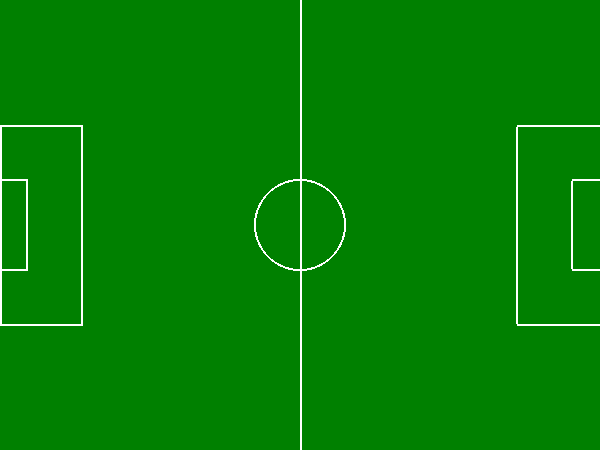

In [17]:
from gymnasium.core import RenderFrame
from PIL import Image, ImageDraw

scale = 5

width, height = 120 * scale, 90 * scale
field = Image.new("RGB", (width, height), "green")  # Green background for the field

# Use PIL's drawing module to add field lines or other details
draw = ImageDraw.Draw(field)

# Drawing center line and circle
draw.line([(width / 2, 0), (width / 2, height)], fill="white", width=2)  # Center line

center_line_radius = 9.15 * scale

draw.ellipse(xy=[
    (width / 2 - center_line_radius, height / 2 - center_line_radius),
    (width / 2 + center_line_radius, height / 2 + center_line_radius)], width=2)

outer_goal_height = 40 * scale
outer_goal_width = 16.5 * scale

inner_goal_height = 18.3 * scale
inner_goal_width = 5.5 * scale

goal_size = 7.32 * scale

# Drawing goals
draw.rectangle(xy=[
    (0, height / 2 - outer_goal_height / 2),
    (outer_goal_width, height / 2 + outer_goal_height / 2)
], width=2)

draw.rectangle(xy=[
    (0, height / 2 - inner_goal_height / 2),
    (inner_goal_width, height / 2 + inner_goal_height / 2)
], width=2)

draw.line(xy=[
    (0, height / 2 - goal_size / 2),
    (0, height / 2 + goal_size / 2),
])

draw.rectangle(xy=[
    (width, height / 2 - outer_goal_height / 2),
    (width - outer_goal_width, height / 2 + outer_goal_height / 2)
], width=2)

draw.rectangle(xy=[
    (width, height / 2 - inner_goal_height / 2),
    (width - inner_goal_width, height / 2 + inner_goal_height / 2)
], width=2)

draw.line(xy=[
    (width, height / 2 - goal_size / 2),
    (width, height / 2 + goal_size / 2),
])

field